Right now, it looks like the branching happens at the $(\textrm{off} + 1)$th node away from the active tip (where $\textrm{off}$ is the offset variable defined by the user), but it actually happens at the $(\textrm{off})$th node from the tip (we just don't see the new branch in the plot until the next time step, when it grows from a single point to a line segment).

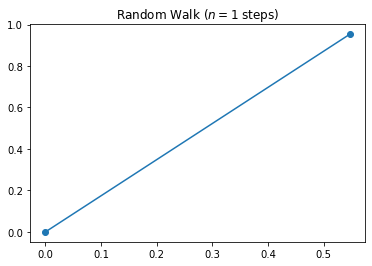

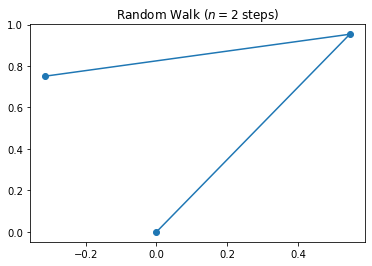

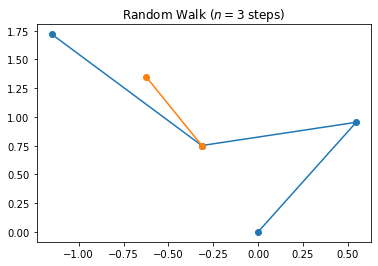

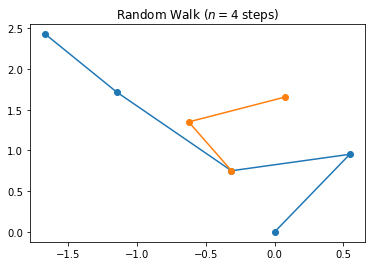

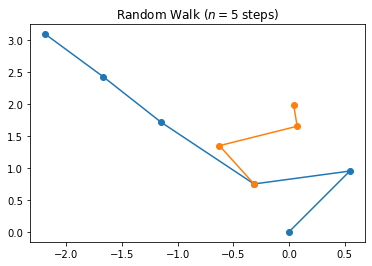

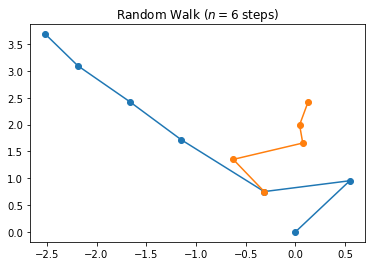

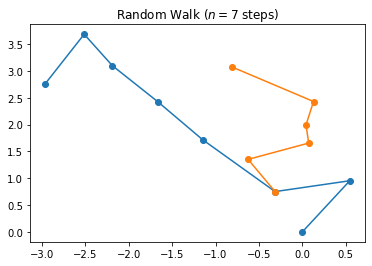

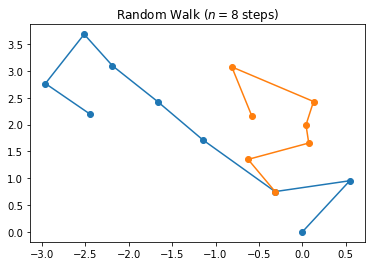

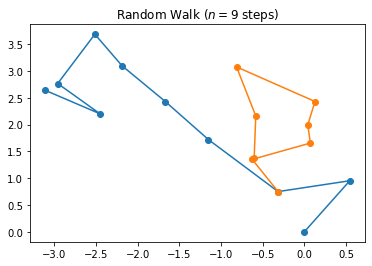

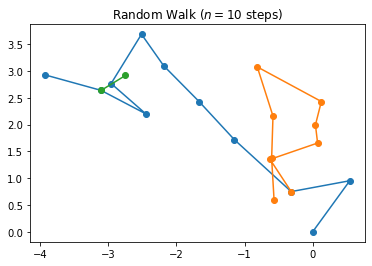

In [27]:
# array of walkers
import numpy as np
import pylab # um is anything actually using this still?
import random
import matplotlib.pyplot as plt

# defining the number of steps
n = 10

# creating first walker: 1x2 array of [0,0]
w1 = [[0,0]]
# w2 = numpy.zeros((n, 2))
# we start at (0,0) but can also go into negative position on coord axes

# creating array of walkers
a = [w1]

# define the branching probability at each time step
bp = 0.1

# branch position offset, off = number of time steps behind the apex 
# of mother branch where daughter branch should sprout
off = 0

# walking randomly -> filling the coordinates with random variables
for i in range(0, n):
    plt.title("Random Walk ($n = " + str(i+1) + "$ steps)")
    wi=0
    
    #only iterate over the number of existing branches, b0
    b0 = len(a)
    
    for j in range(b0):
        # find the change in position
        dp = [2*random.random()-1, 2*random.random()-1]
        
        # add new position to walker path
        a[j].append([sum(z) for z in zip(a[j][-1],dp)])    

        # branch with probability bp at specified offset, if possible
        if (random.random() < bp) & (off < len(a[j])):
            a.append([a[j][-(1+off)].copy()])
        x, y = zip(*a[j])
        plt.plot(x, y, 'o-')
    plt.show()
# print(len(a)) # print final number of branches

